## TASK 1: Data Preparation


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
#Reading the csv
data = pd.read_csv('Telco_Customer_Churn_Dataset  (1).csv')
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3007,6022-UGGSO,Female,1,No,No,32,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,2276.95,Yes
5475,1114-CENIM,Male,0,No,Yes,54,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),55.00,3092.65,Yes
261,3606-TWKGI,Male,1,No,No,13,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.90,1364.3,Yes
6270,0625-AFOHS,Female,0,Yes,Yes,29,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.20,558.8,No
4036,4054-CUMIA,Female,0,Yes,Yes,18,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.25,401.95,No


In [3]:
data.shape

(7043, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Since 'customerID' is not a relavant feature for churn detection it is deleted

In [5]:
data.drop(columns = 'customerID', inplace = True)
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Converting 'TotalCharges' from object datatype to numeric datatype

In [6]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

#### Checking for null values and deleting them

In [7]:
print(data.isnull().sum())
data1 = data.dropna()
print(f"\nSHAPE of dataset before: {data.shape}")
print(f"SHAPE of dataset after: {data1.shape}")

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

SHAPE of dataset before: (7043, 20)
SHAPE of dataset after: (7032, 20)


In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#### Data Visualization

Text(0, 0.5, 'No. of customers')

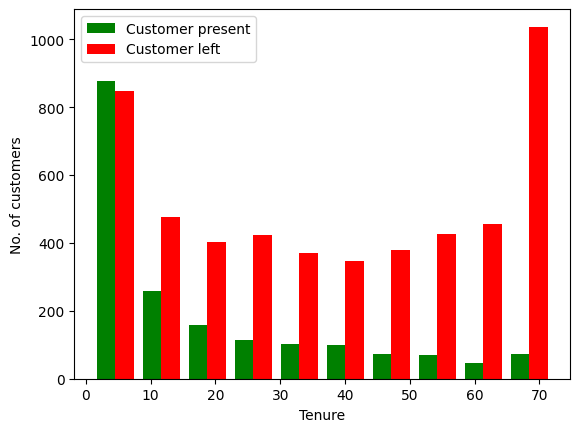

In [9]:
# Customer that are not with the company and customers that are still with the companny  
customer_left = data1[data1['Churn'] == 'No'].tenure
customer_present = data1[data1['Churn'] == 'Yes'].tenure

plt.hist([customer_present, customer_left], color = ['green', 'red'])
plt.legend(['Customer present','Customer left'])
plt.xlabel('Tenure')
plt.ylabel('No. of customers')

In [10]:
# Making list of numeric columns
numeric_columns = data1.select_dtypes(exclude=['object']).columns.to_list()
numeric_columns.pop(0)
numeric_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

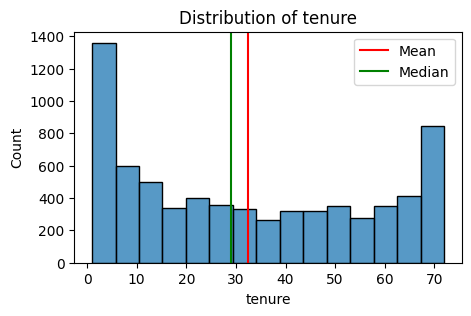

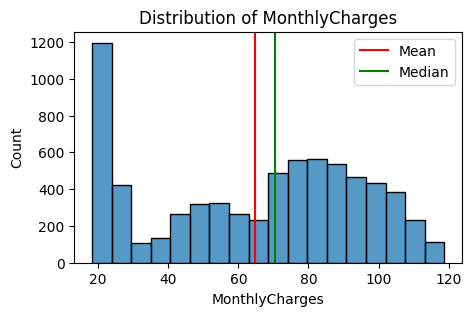

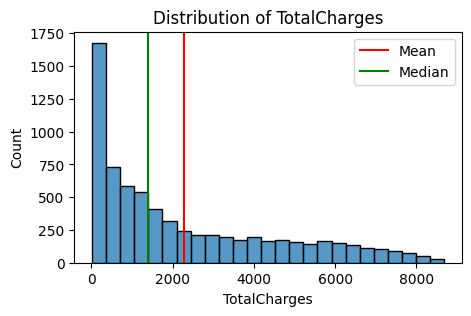

In [11]:
# Histogram of Numeric Columns
for column in numeric_columns:
  plt.figure(figsize=(5, 3))
  sns.histplot(data1[column])
  plt.title(f"Distribution of {column}")

  # Marking the mean and median
  col_mean = data1[column].mean()
  col_median = data1[column].median()

  plt.axvline(col_mean, color="red", label="Mean")
  plt.axvline(col_median, color="green", label="Median")
  plt.legend()
  plt.show()

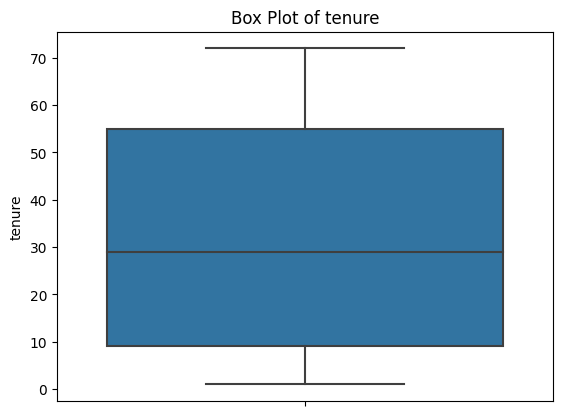

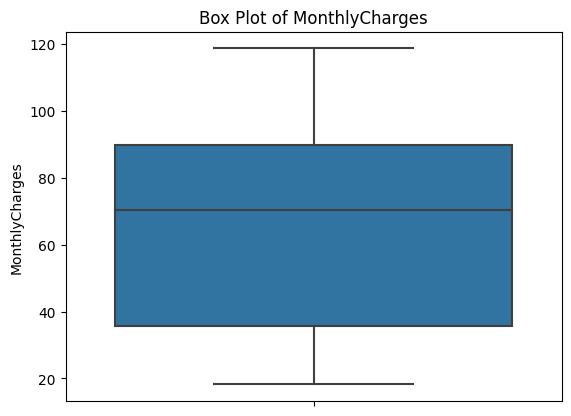

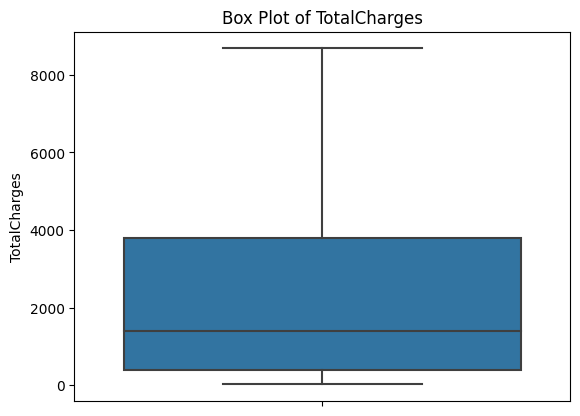

In [12]:
for column in numeric_columns:
  sns.boxplot(y = data1[column])
  plt.title(f"Box Plot of {column}")
  plt.ylabel(column)
  plt.show()

In [13]:
cat_cols = []
for column in data1:
  if data[column].dtype == 'object':
    cat_cols.append(column)
    print(f"{column} : {data[column].unique()}")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [14]:
data1.replace(['No phone service', 'No internet service'], 'No', inplace = True)

c:\Users\Diya Nayak\Desktop\ML_projects\tensor_env\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


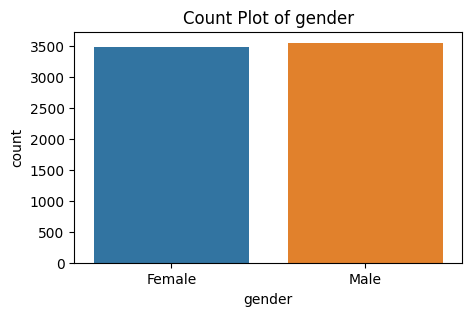

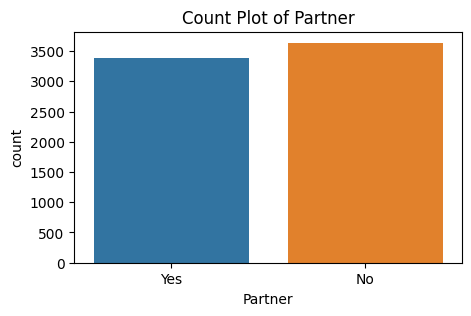

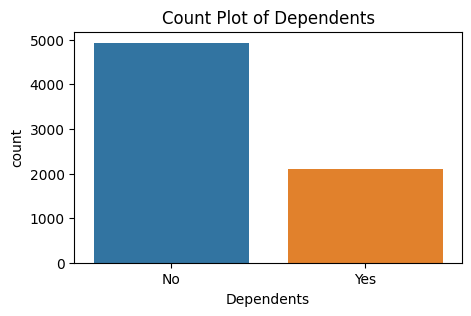

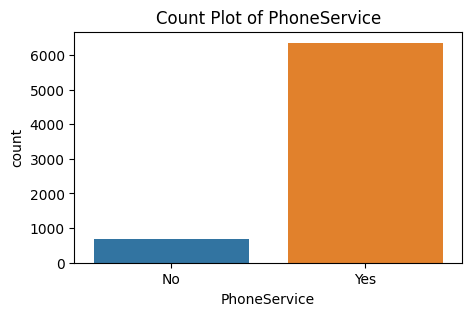

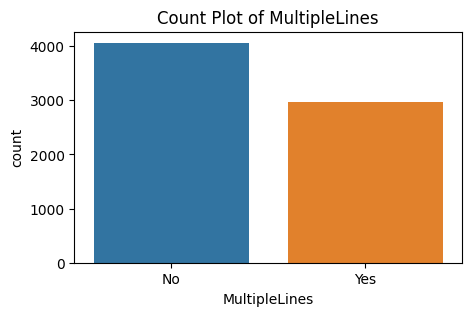

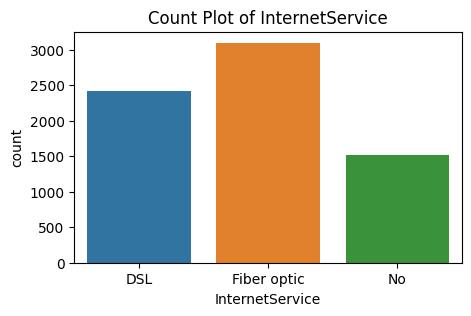

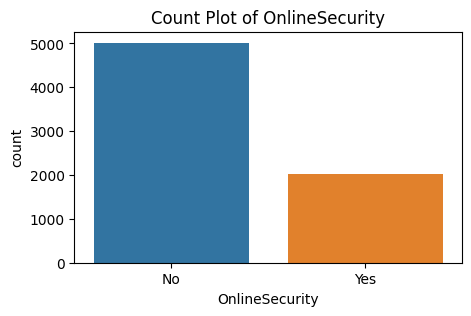

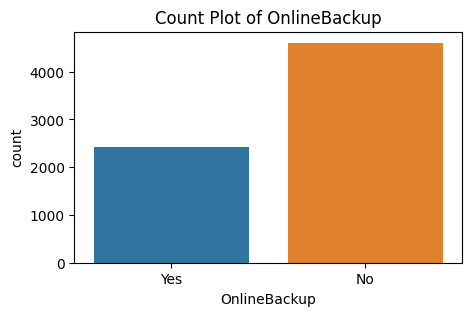

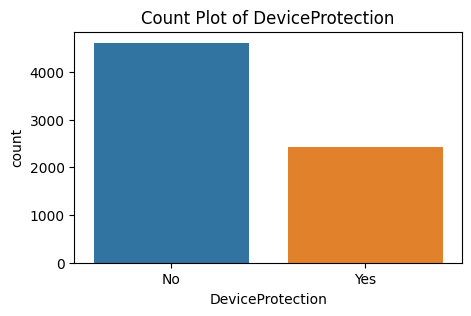

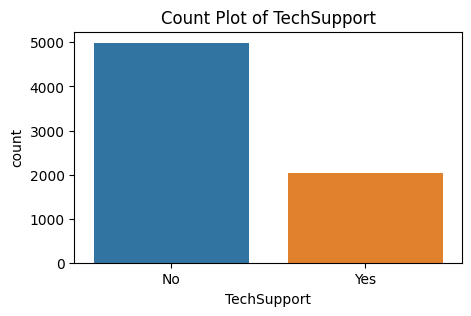

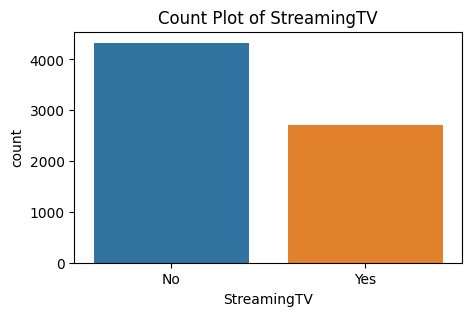

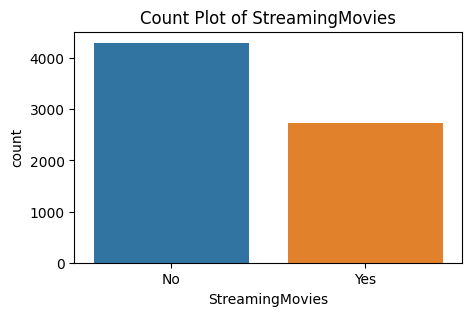

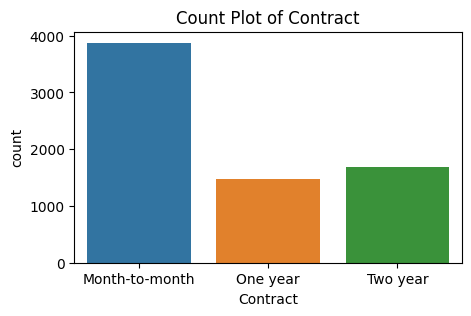

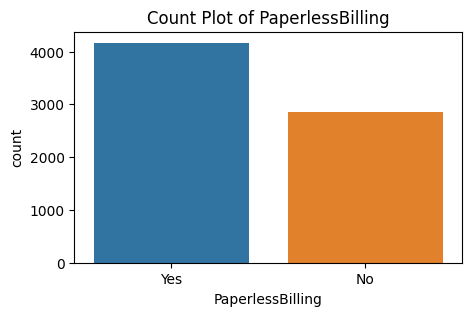

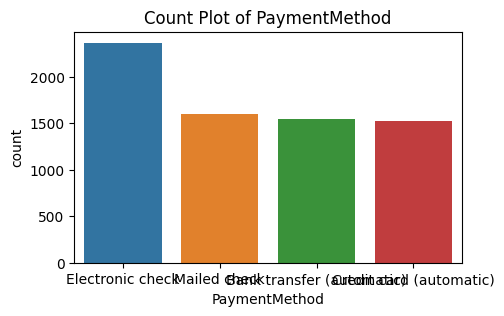

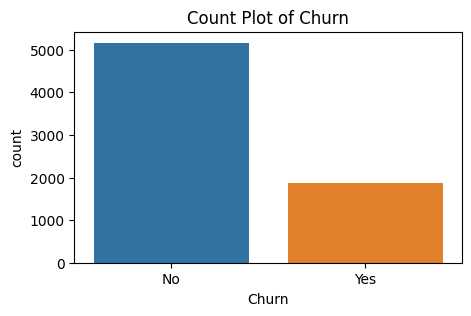

In [15]:
for col in cat_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=data1[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

In [16]:
def yes_no_col(data):
  cols = []
  for column in data:
    if data[column].dtype == 'object' and 'Yes' in data[column].unique() and 'No' in data[column].unique():
      cols.append(column)
  return cols
yes_no_cols = yes_no_col(data1)

# Columns with non-ordinal and multiple values 
one_hot_cols = ['InternetService', 'PaymentMethod']

label_encoding_col = 'Contract'

In [17]:
for column in yes_no_cols:
  data1[column].replace({"Yes": 1, "No": 0}, inplace=True)
data1['gender'].replace({'Female': 1, 'Male': 0}, inplace = True)

c:\Users\Diya Nayak\Desktop\ML_projects\tensor_env\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [18]:
def display_unique_values(data):
  for column in data:
    print(f"{column} : {data[column].unique()}")
    print(f"datatype: {data[column].dtypes}")

#### Applying One-hot Encoding

In [19]:
data2 = pd.get_dummies(data1, columns= one_hot_cols, dtype= int)

#### Applying Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

print(data2[label_encoding_col])

data2[label_encoding_col] = label_encoder.fit_transform(data2[label_encoding_col])

data2[label_encoding_col]

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7032, dtype: object


0       0
1       1
2       0
3       1
4       0
       ..
7038    1
7039    1
7040    0
7041    0
7042    2
Name: Contract, Length: 7032, dtype: int32

In [21]:
display_unique_values(data2)

gender : [1 0]
datatype: int64
SeniorCitizen : [0 1]
datatype: int64
Partner : [1 0]
datatype: int64
Dependents : [0 1]
datatype: int64
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
datatype: int64
PhoneService : [0 1]
datatype: int64
MultipleLines : [0 1]
datatype: int64
OnlineSecurity : [0 1]
datatype: int64
OnlineBackup : [1 0]
datatype: int64
DeviceProtection : [0 1]
datatype: int64
TechSupport : [0 1]
datatype: int64
StreamingTV : [0 1]
datatype: int64
StreamingMovies : [0 1]
datatype: int64
Contract : [0 1 2]
datatype: int32
PaperlessBilling : [1 0]
datatype: int64
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
datatype: float64
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
datatype: float64
Churn : [0 1]
datatype: int64
InternetService_DSL : [1 0]
datatype: int32
I

In [22]:
print(data2.shape)

(7032, 25)


In [23]:
columns_to_be_scaled = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data2[columns_to_be_scaled]=scaler.fit_transform(data2[columns_to_be_scaled])
data2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5928,1,0,1,1,1.164390,1,0,0,0,0,...,-1.497422,-0.428702,0,0,0,1,0,1,0,0
1902,0,0,1,1,1.612573,1,1,1,1,1,...,0.857663,1.834700,0,1,0,0,0,1,0,0
2223,1,0,0,0,-0.180161,1,1,0,1,0,...,0.836057,0.150996,1,0,1,0,0,0,1,0
928,1,0,1,1,1.449597,1,1,0,1,0,...,1.294775,2.098354,0,0,1,0,0,1,0,0
301,1,1,0,0,-1.158016,1,1,0,0,0,...,1.018879,-0.832609,1,0,1,0,0,0,1,0


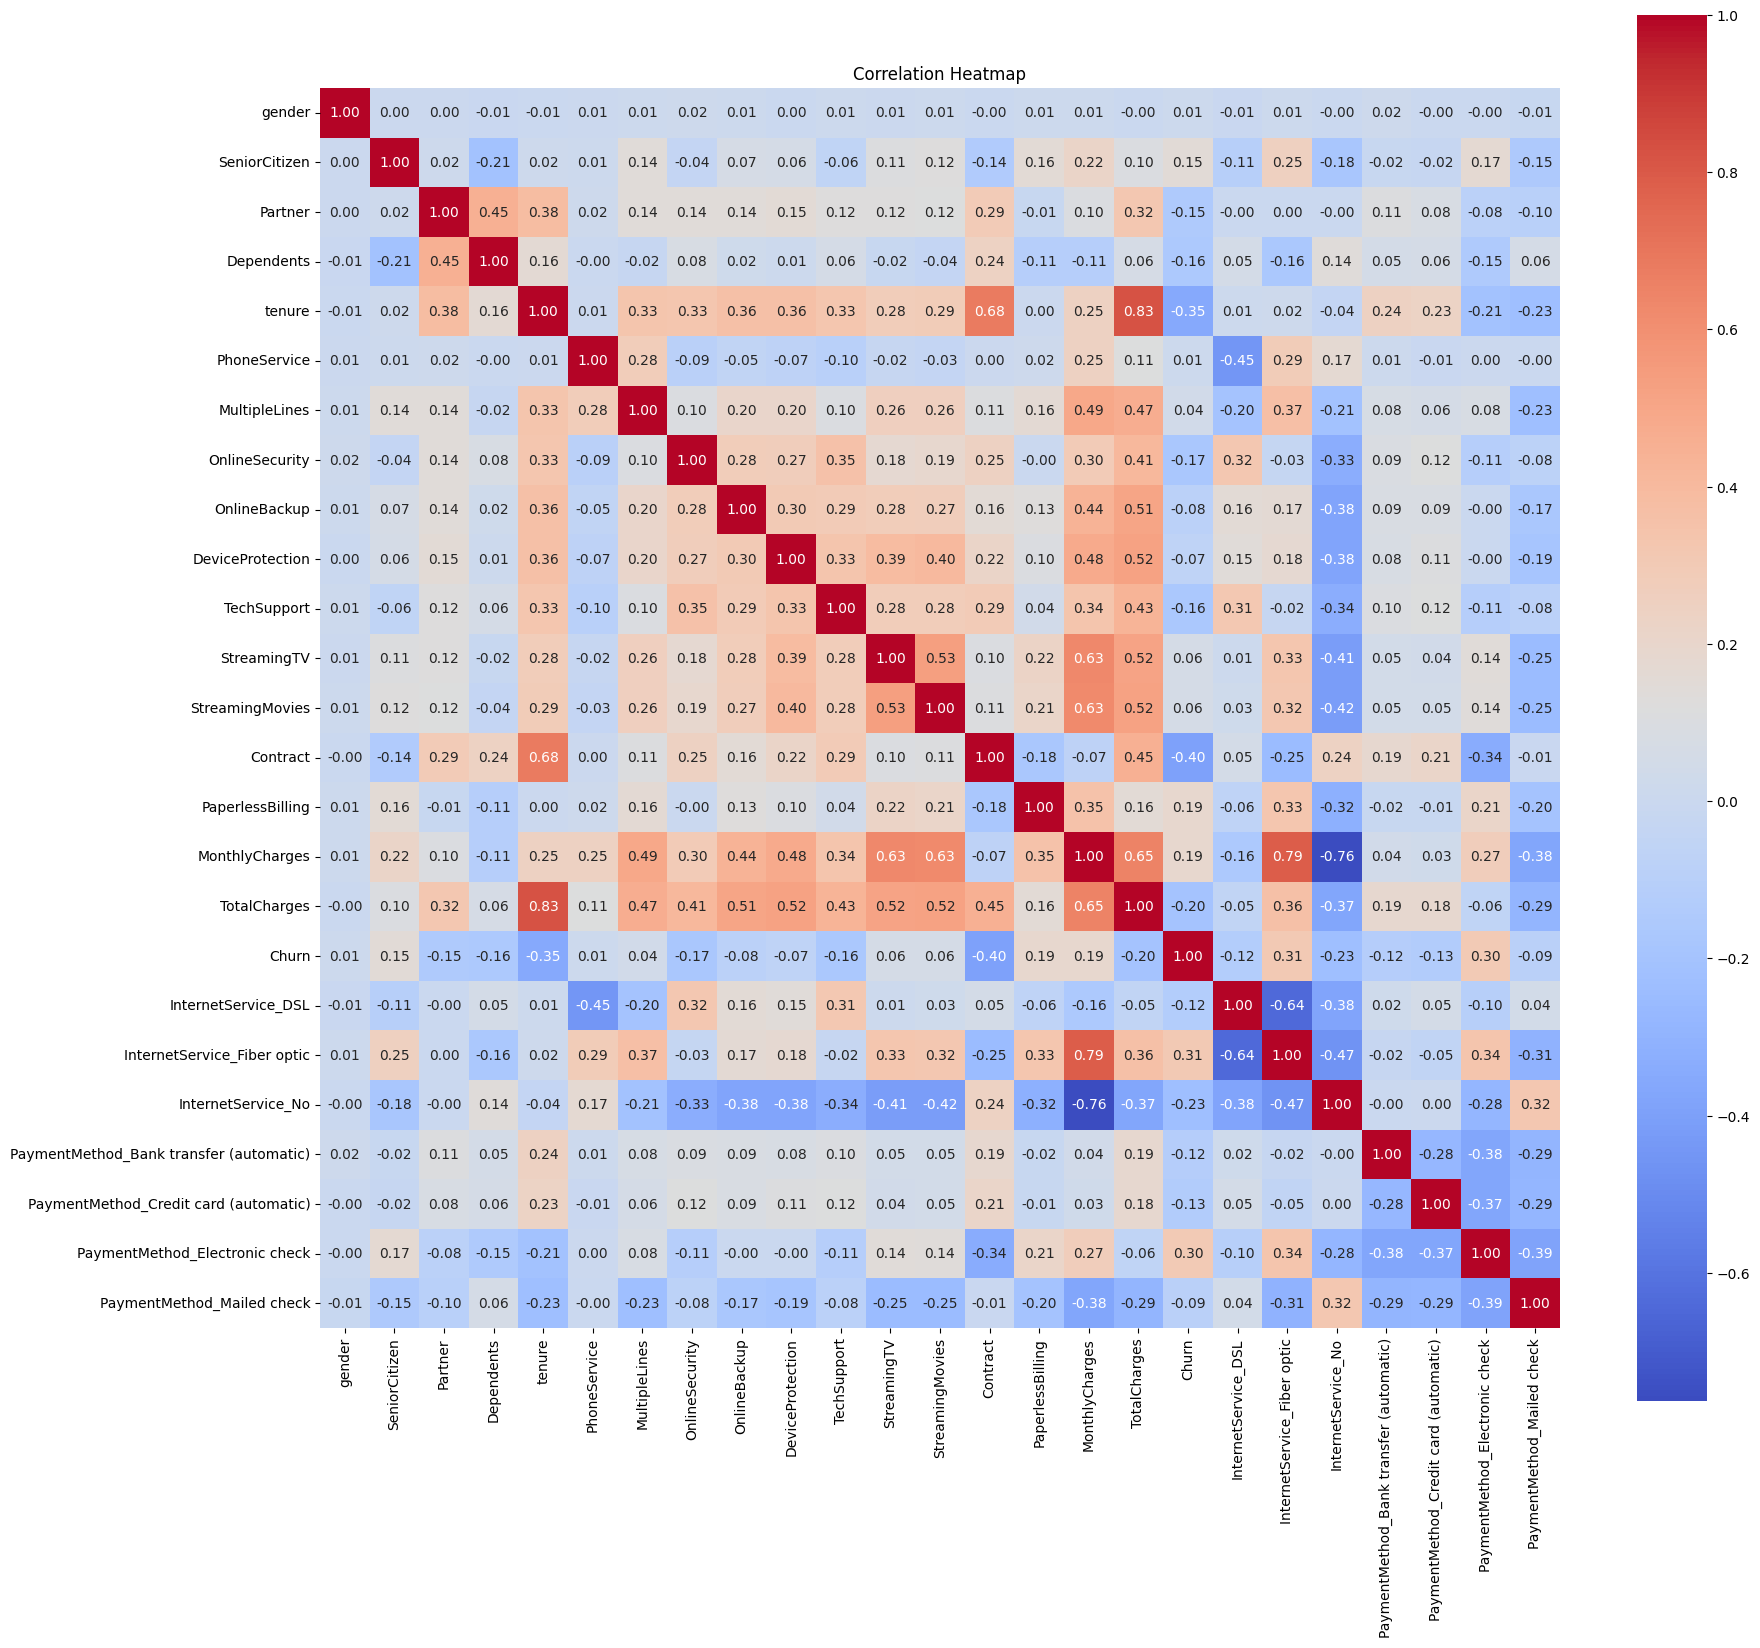

In [24]:
plt.figure(figsize=(20,18))
sns.heatmap(data2.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

## TASK 2: Split Data for Training and Testing

In [25]:
data2['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [26]:
X = data2.drop(columns = ['Churn'])
y = data2['Churn']

In [27]:
# Train set: 80%, Test set: 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5625, 24) (1407, 24) (5625,) (1407,)


In [28]:
# Majority class -> 0 
# Minority class -> 1

# Storing the count of majority an minority class

train_data = pd.concat([X_train, y_train], axis=1)

majority_class_count = train_data[train_data['Churn']==0].Churn.count()
minority_class_count = train_data[train_data['Churn']==1].Churn.count()

# Storing the Dataframe of majority an minority class
majority_class = train_data[train_data['Churn']==0]
minority_class = train_data[train_data['Churn']==1]

### Undersampling

In [29]:
# Performing Undersampling
under_maj_class = train_data[train_data['Churn']==0].sample(minority_class_count)

train_data = pd.concat([minority_class, under_maj_class])

X_train = train_data.drop(columns= 'Churn')
y_train = train_data['Churn']

y_train.value_counts()


1    1495
0    1495
Name: Churn, dtype: int64

#### SMOTE

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [31]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 42)
X_train, y_train = smote.fit_resample(X_train, y_train)

y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

## TASK 2: Model Selection

### Random Forest

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
def print_classification_report(y_test, y_pred):
  sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(f"Confusion Matrix")
  cm = classification_report(y_test, y_pred)
  print(cm)

In [33]:
def print_cross_validation(model, X_train, y_train, y_test, y_pred, k=5):
  
  #StratifiedKFold cross-validation with 5 splits
  kf = StratifiedKFold(n_splits = k, shuffle = True, random_state = 42)
  # Cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

  # Print the cross-validation results
  print("Cross-validation scores for each fold: ", cv_scores)
  print("Mean cross-validation score: ", np.mean(cv_scores))

  # Calculate accuracy on the test set
  print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred))

#### Model training

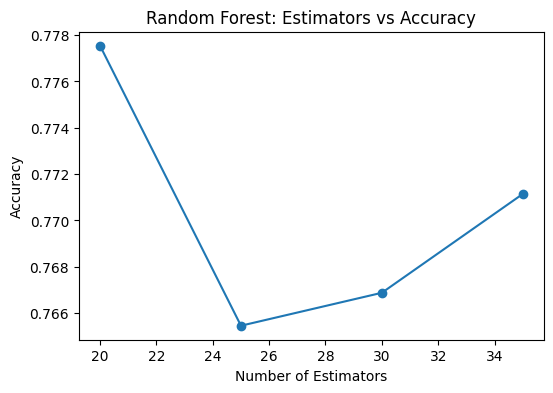

In [34]:
from sklearn.ensemble import RandomForestClassifier
estimators_range = [20, 25, 30, 35]
scores = []

for n in estimators_range:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.figure(figsize=(6, 4))
plt.plot(estimators_range, scores, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest: Estimators vs Accuracy")
plt.show()

In [35]:
# Function to optimize and train Random Forest
def train_random_forest(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(n_estimators = 20, random_state=42)
    model.fit(X_train, y_train)

    return model

In [36]:
rf = train_random_forest(X_train, y_train, X_test, y_test)

#### Model Testing

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1033
           1       0.57      0.64      0.60       374

    accuracy                           0.78      1407
   macro avg       0.72      0.73      0.72      1407
weighted avg       0.79      0.78      0.78      1407



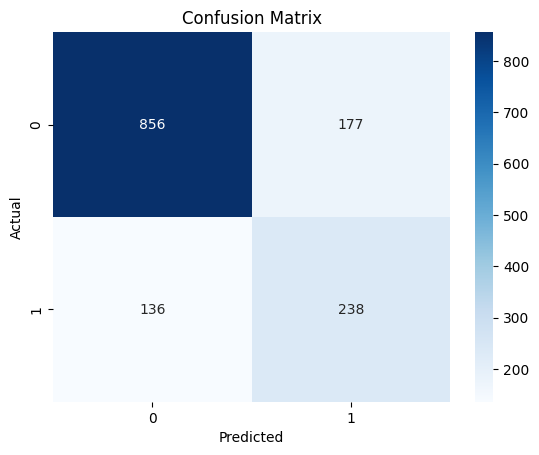

In [37]:
y_pred = rf.predict(X_test)
print_classification_report(y_test, y_pred)

In [38]:
print_cross_validation(rf, X_train, y_train, y_test, y_pred)

Cross-validation scores for each fold:  [0.83716707 0.83716707 0.83837772 0.83292978 0.82990315]
Mean cross-validation score:  0.8351089588377725
Accuracy on Test Set:  0.7775408670931059


Average accuracy of individual trees: 0.7058990760483297


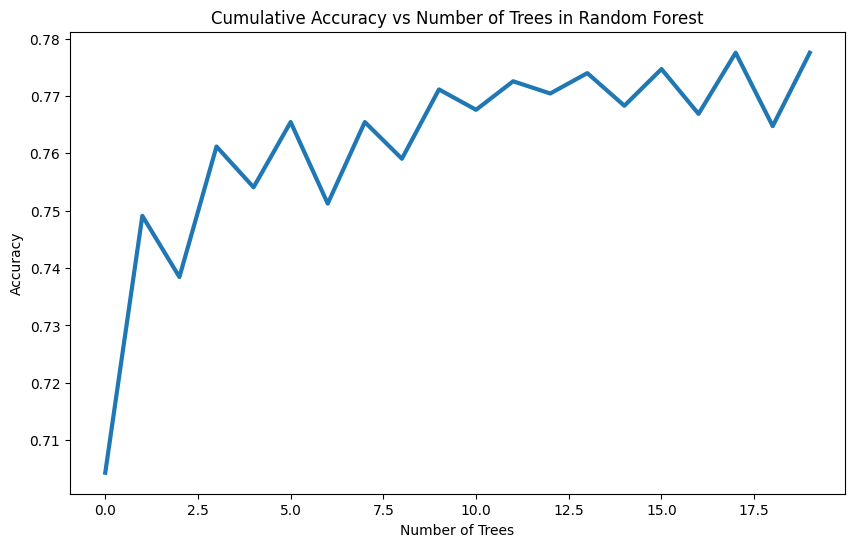

Best number of estimators: 18 with accuracy: 0.7775

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1033
           1       0.57      0.63      0.60       374

    accuracy                           0.78      1407
   macro avg       0.72      0.73      0.72      1407
weighted avg       0.79      0.78      0.78      1407



In [39]:
# Check individual accuracy of each tree to diagnose
single_tree_accuracies = []
for tree in rf.estimators_:
    tree_pred = tree.predict(X_test.values)
    single_tree_accuracies.append(accuracy_score(y_test, tree_pred))

print("Average accuracy of individual trees:", np.mean(single_tree_accuracies))

predictions = np.array([tree.predict_proba(X_test.values) for tree in rf.estimators_])
cum_mean = np.cumsum(predictions, axis=0) / np.arange(1, predictions.shape[0] + 1)[:, None, None]

# Compute accuracy with updated cumulative predictions
scores = []
for pred in cum_mean:
    pred_labels = np.argmax(pred, axis=1)  # Get the label with highest probability
    scores.append(accuracy_score(y_test, pred_labels))

plt.figure(figsize=(10, 6))
plt.plot(scores, linewidth=3)
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Cumulative Accuracy vs Number of Trees in Random Forest')
plt.show()

best_n_estimators = np.argmax(scores) + 1
print(f"Best number of estimators: {best_n_estimators} with accuracy: {scores[best_n_estimators - 1]:.4f}")
 
# Get the cumulative predictions for the model with the highest accuracy
best_predictions = np.argmax(cum_mean[best_n_estimators - 1], axis=1)

# Display the classification report for the best model
print("\nClassification Report for Best Model:")
print(classification_report(y_test, best_predictions))


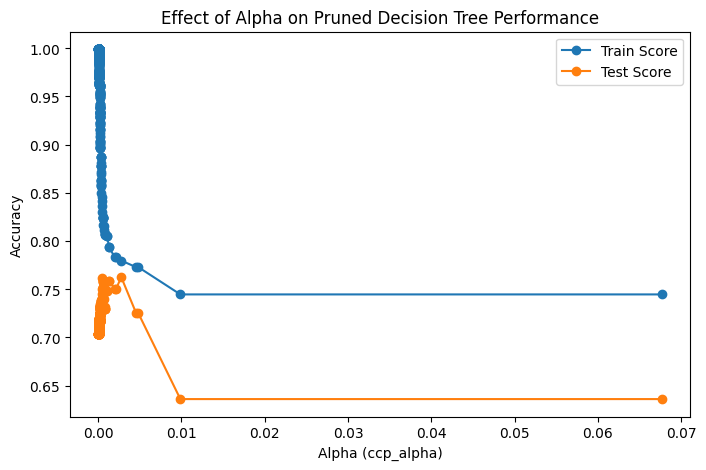

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)

# Get ccp_alphas from the cost complexity pruning path
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path['ccp_alphas']

# Store results
train_scores = []
test_scores = []

for alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    pruned_tree.fit(X_train, y_train)

    train_scores.append(pruned_tree.score(X_train, y_train))
    test_scores.append(pruned_tree.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train Score")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test Score")
plt.xlabel("Alpha (ccp_alpha)")
plt.ylabel("Accuracy")
plt.title("Effect of Alpha on Pruned Decision Tree Performance")
plt.legend()
plt.show()

<span style="font-size: 14px;">

1. **Left side (very small α values)** → Overfitting (train accuracy is too high).
2. **Right side (high α values)** → Underfitting (both train and test accuracy drop).
3. **Middle range (~0.005 - 0.01)** → Best trade-off between bias and variance.

In [41]:
best_alpha = 0.0035 # Choose the best value from the graph
pruned_tree = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0035, random_state=42)

In [42]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = pruned_tree.predict(X_test)

print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on Test Set: 0.7626154939587776
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      1033
           1       0.54      0.70      0.61       374

    accuracy                           0.76      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.76      0.77      1407



### Gradient Boosting

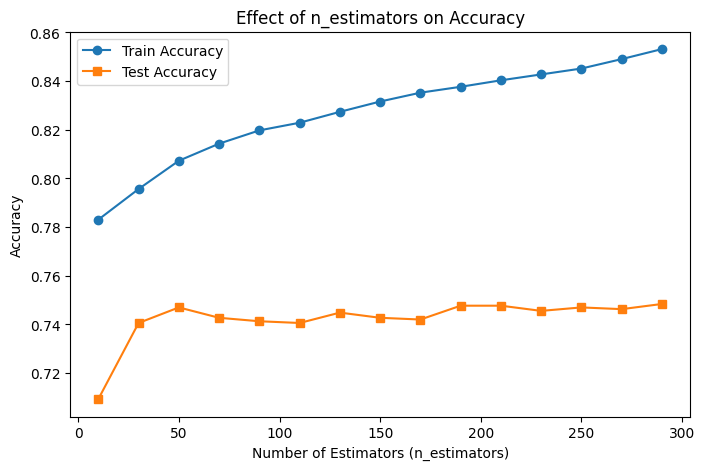

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

# Define a range for n_estimators
n_estimators_range = range(10, 300, 20)
train_acc = []
test_acc = []

for n in n_estimators_range:
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

# Plot Training vs Test Accuracy
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_range, train_acc, label="Train Accuracy", marker='o')
plt.plot(n_estimators_range, test_acc, label="Test Accuracy", marker='s')
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Effect of n_estimators on Accuracy")
plt.legend()
plt.show()

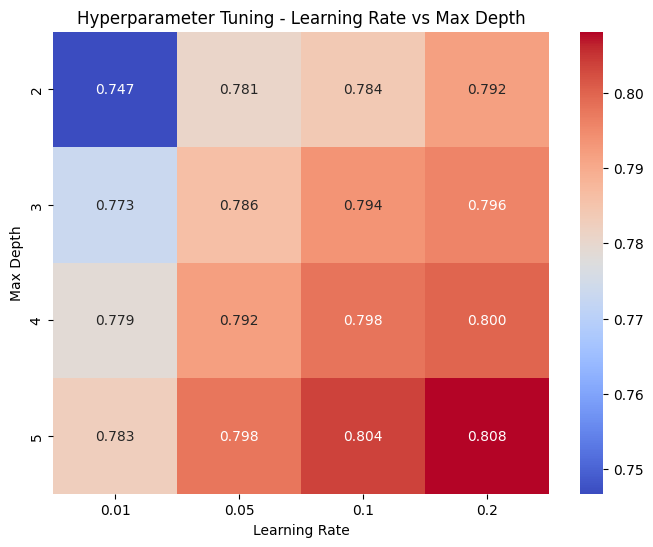

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4, 5]
}

# Perform Grid Search
grid_search = GridSearchCV(GradientBoostingClassifier(n_estimators=50, random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Convert results to DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Pivot table for heatmap
heatmap_data = results.pivot(index="param_max_depth", columns="param_learning_rate", values="mean_test_score")

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".3f")
plt.xlabel("Learning Rate")
plt.ylabel("Max Depth")
plt.title("Hyperparameter Tuning - Learning Rate vs Max Depth")
plt.show()


In [45]:
# Function to optimize and train Gradient Boosting
def train_gradient_boosting(X_train, y_train, X_test, y_test):
    
    GradientBoostingClassifier(max_depth= 5, learning_rate= 0.2, n_estimators=50, random_state= 42)
    model.fit(X_train, y_train)

    return model

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1033
           1       0.52      0.71      0.60       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.78      0.75      0.76      1407



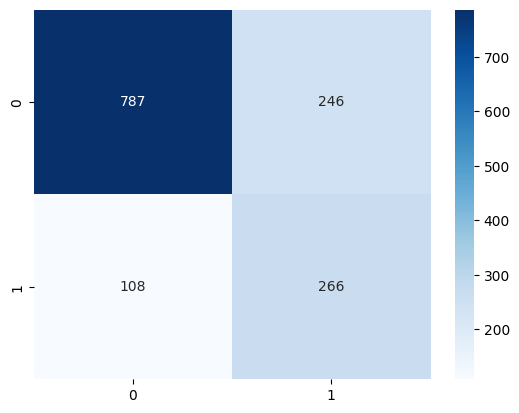

In [46]:
gbm = train_gradient_boosting(X_train, y_train, X_test, y_test)

y_pred = gbm.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
cm = classification_report(y_test, y_pred)
print(cm)

In [47]:
print_cross_validation(gbm, X_train, y_train, y_test, y_pred)

Cross-validation scores for each fold:  [0.81355932 0.81719128 0.80569007 0.80932203 0.82445521]
Mean cross-validation score:  0.814043583535109
Accuracy on Test Set:  0.7484008528784648


### Logistic Regression

c:\Users\Diya Nayak\Desktop\ML_projects\tensor_env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Diya Nayak\Desktop\ML_projects\tensor_env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

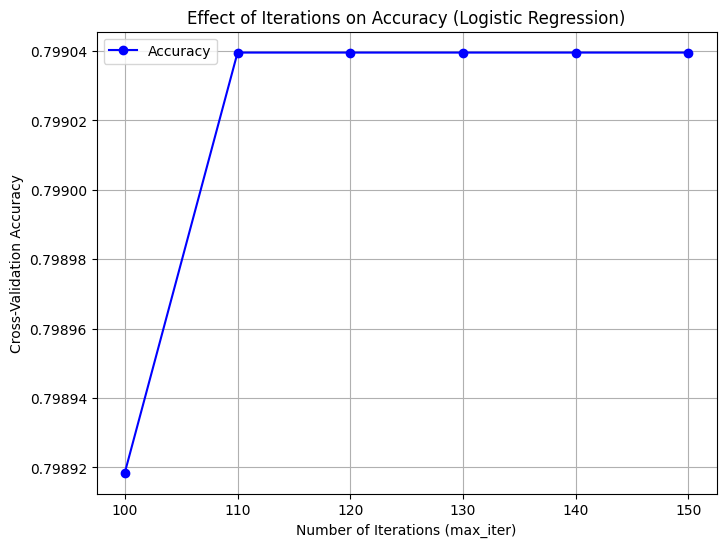

In [48]:
from sklearn.linear_model import LogisticRegression

# Define different values for max_iter
iterations = [100, 110, 120, 130, 140, 150]
accuracy_scores = []

# Evaluate model for different iterations
for iter_value in iterations:
    model = LogisticRegression(max_iter=iter_value, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    accuracy_scores.append(np.mean(scores))

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(iterations, accuracy_scores, marker='o', linestyle='-', color='b', label="Accuracy")
plt.xlabel("Number of Iterations (max_iter)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Effect of Iterations on Accuracy (Logistic Regression)")
plt.legend()
plt.grid()
plt.show()


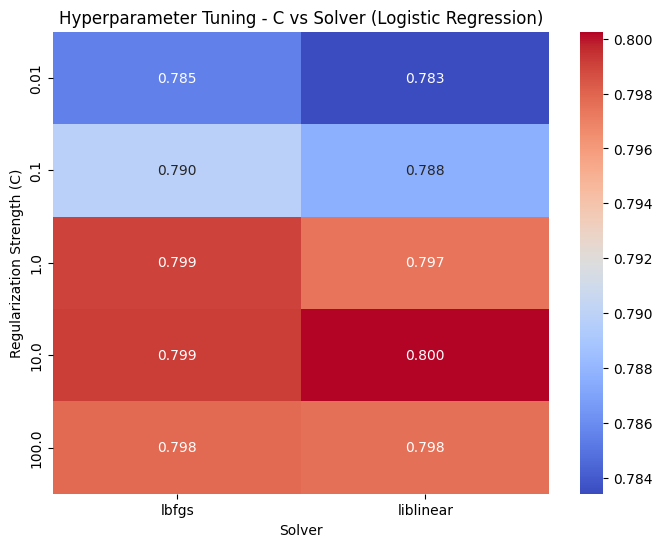

In [49]:
# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']
}

# Perform Grid Search
grid_search = GridSearchCV(LogisticRegression(max_iter=110, random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Convert results to DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Pivot table for heatmap
heatmap_data = results.pivot(index="param_C", columns="param_solver", values="mean_test_score")

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".3f")
plt.xlabel("Solver")
plt.ylabel("Regularization Strength (C)")
plt.title("Hyperparameter Tuning - C vs Solver (Logistic Regression)")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

# Function to optimize and train Logistic Regression
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(C = 10.0, solver = 'liblinear', max_iter = 110, random_state = 42)
    model.fit(X_train, y_train)

    return model

In [51]:
lr = train_logistic_regression(X_train, y_train, X_test, y_test)
y_pred = lr.predict(X_test)

In [52]:
print_cross_validation(lr, X_train, y_train, y_test, y_pred)

Cross-validation scores for each fold:  [0.80266344 0.81719128 0.81234867 0.82082324 0.81719128]
Mean cross-validation score:  0.814043583535109
Accuracy on Test Set:  0.7547974413646056


### Artifical Neural Network (ANN)

In [53]:
from tensorflow import keras

def train_ANN(X_train, y_train, X_test, y_test):
  model = keras.Sequential([
    keras.layers.Dense(15, input_shape = (24,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'relu'),
    keras.layers.Dense(10, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
  ])

  model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
  )
  model.fit(X_train, y_train, epochs = 10)

  return model

In [54]:
ANN = train_ANN(X_train, y_train, X_test, y_test)

y_pred = ANN.predict(X_test)
y_pred = np.array([1 if i >= 0.5 else 0 for i in y_pred])

Epoch 1/10
259/259 [==============================] - 4s 5ms/step - loss: 0.5136 - accuracy: 0.7498
Epoch 2/10
259/259 [==============================] - 1s 5ms/step - loss: 0.4487 - accuracy: 0.7919
Epoch 3/10
259/259 [==============================] - 1s 5ms/step - loss: 0.4399 - accuracy: 0.7954
Epoch 4/10
259/259 [==============================] - 1s 6ms/step - loss: 0.4356 - accuracy: 0.7975
Epoch 5/10
259/259 [==============================] - 2s 6ms/step - loss: 0.4315 - accuracy: 0.7989
Epoch 6/10
259/259 [==============================] - 1s 5ms/step - loss: 0.4282 - accuracy: 0.8011
Epoch 7/10
259/259 [==============================] - 1s 5ms/step - loss: 0.4248 - accuracy: 0.8031
Epoch 8/10
259/259 [==============================] - 1s 5ms/step - loss: 0.4212 - accuracy: 0.8054
Epoch 9/10
259/259 [==============================] - 1s 5ms/step - loss: 0.4195 - accuracy: 0.8053
Epoch 10/10
259/259 [==============================] - 1s 5ms/step - loss: 0.4178 - accuracy: 0.8077

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1033
           1       0.52      0.70      0.59       374

    accuracy                           0.75      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.75      0.76      1407



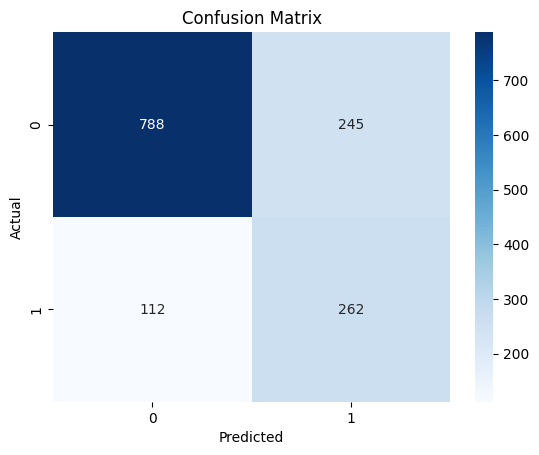

In [55]:
print_classification_report(y_test, y_pred)

## TASK-4 Model evaluation

In [56]:
# Main function to evaluate models
def evaluate_model(model_name, balancing_method, X, y, test_size=0.2, random_state=42, k=5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    # Apply balancing method
    if balancing_method == "undersampling":
        train_data = pd.concat([X_train, y_train], axis=1)
        minority_class = train_data[train_data['Churn'] == 1]
        majority_class = train_data[train_data['Churn'] == 0].sample(n=len(minority_class), random_state=random_state)
        balanced_data = pd.concat([minority_class, majority_class])
        X_train = balanced_data.drop(columns=['Churn'])
        y_train = balanced_data['Churn']

    elif balancing_method == "SMOTE":
        smote = SMOTE(random_state = random_state)
        X_train, y_train = smote.fit_resample(X_train, y_train)

    # Choose model
    if model_name == "random_forest":
        model = train_random_forest(X_train, y_train, X_test, y_test)
    elif model_name == "logistic_regression":
        model = train_logistic_regression(X_train, y_train, X_test, y_test)
    elif model_name == "gradient_boosting":
        model = train_gradient_boosting(X_train, y_train, X_test, y_test)
    else:
        raise ValueError("Invalid model name. Choose from 'random_forest', 'logistic_regression', or 'gradient_boosting'.")

    # Predictions
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {model_name} ({balancing_method})")
    plt.show()

    # Classification Report
    print(f"\nClassification Report for {model_name} ({balancing_method}):")
    print(classification_report(y_test, y_pred))

    # K-Fold Cross-Validation
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

    print(f"\nCross-validation scores for {model_name} ({balancing_method}):", cv_scores)
    print(f"Mean cross-validation accuracy: {np.mean(cv_scores):.4f}")

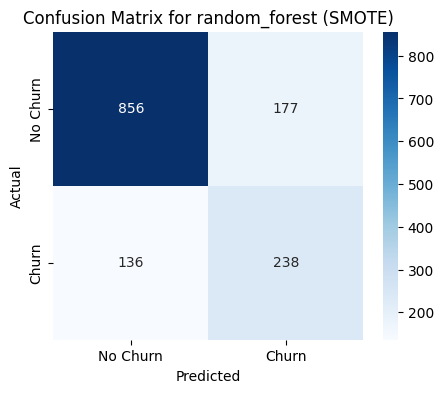


Classification Report for random_forest (SMOTE):
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1033
           1       0.57      0.64      0.60       374

    accuracy                           0.78      1407
   macro avg       0.72      0.73      0.72      1407
weighted avg       0.79      0.78      0.78      1407


Cross-validation scores for random_forest (SMOTE): [0.7782516  0.78678038 0.77738265 0.7916074  0.79231863]
Mean cross-validation accuracy: 0.7853


In [57]:
evaluate_model('random_forest', 'SMOTE', X, y,)

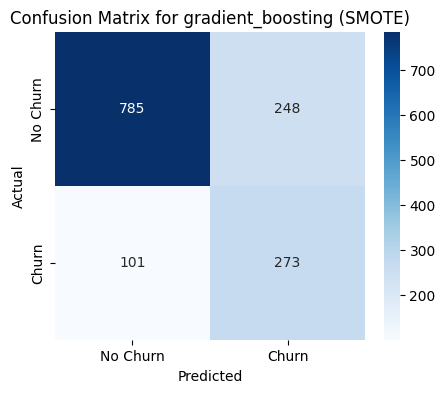


Classification Report for gradient_boosting (SMOTE):
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1033
           1       0.52      0.73      0.61       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.75      0.76      1407


Cross-validation scores for gradient_boosting (SMOTE): [0.78962331 0.81947406 0.78662873 0.80512091 0.82290185]
Mean cross-validation accuracy: 0.8047


In [58]:
evaluate_model('gradient_boosting', 'SMOTE', X, y,)

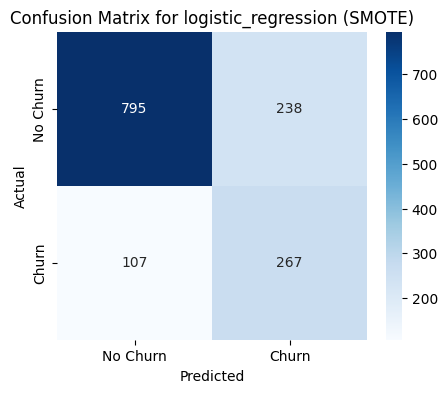


Classification Report for logistic_regression (SMOTE):
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1033
           1       0.53      0.71      0.61       374

    accuracy                           0.75      1407
   macro avg       0.71      0.74      0.71      1407
weighted avg       0.79      0.75      0.76      1407


Cross-validation scores for logistic_regression (SMOTE): [0.78891258 0.81876333 0.78805121 0.80440967 0.82076814]
Mean cross-validation accuracy: 0.8042


In [59]:
evaluate_model('logistic_regression', 'SMOTE', X, y,)

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1033
           1       0.57      0.64      0.60       374

    accuracy                           0.78      1407
   macro avg       0.72      0.73      0.72      1407
weighted avg       0.79      0.78      0.78      1407

ROC-AUC: 0.8094


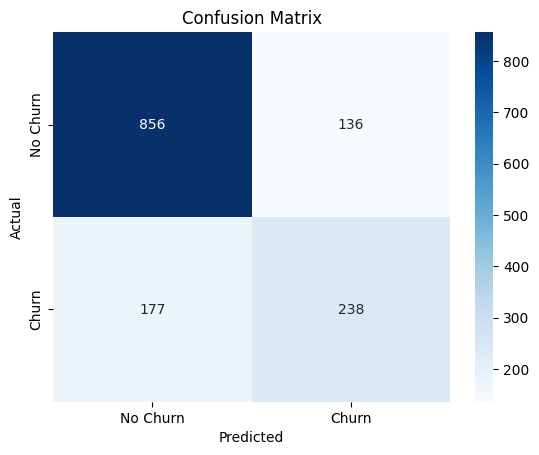

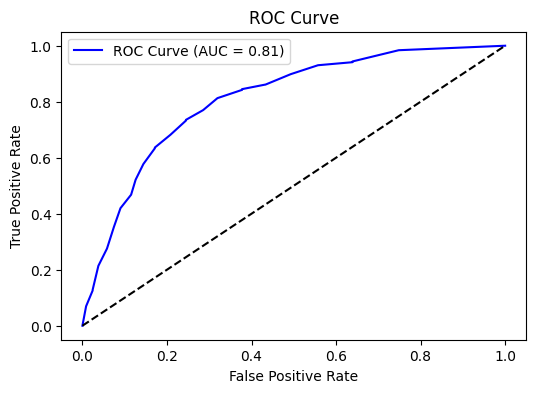

In [64]:
smote = SMOTE(random_state = 42)
X_train, y_train = smote.fit_resample(X_train, y_train)

rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]  # Probability for ROC

# Compute Metrics
print_classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"ROC-AUC: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
